## 랜덤 포레스트 기법을 통한 예측 모델링


In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [86]:
data = pd.read_csv("DATA/act_labeling_data_fix.csv",encoding="cp949")

In [87]:
scaler_data = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND',  'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']]
       

In [88]:
scaler = RobustScaler()
#scaler = MinMaxScaler()
scaler = scaler.fit_transform(scaler_data)

In [89]:
data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND',  'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']] = scaler

### 이제 위에 코드는 import만 실행시키시면됩니다.

In [2]:
data = pd.read_csv("DATA/Robust_scaler_result.csv",encoding="cp949")

In [3]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [4]:
features = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']] #GKIND 갖고 가나요?.. 아뇨..ㅋㅋㅋ
act = data['ACTCD'] 

In [5]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 19) (11736, 19) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

제가 먼저 smot부터 돌릴게요ㅠ

넵 전 그럼 랜덤포레스트 찾아볼께요!
네네 찾으시는동안 train test까지 바꿔놓을게요
네!! 해놨어요 학습은 
밑에 엄청 많네요?

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 학습 진행
for i in (10, 20, 30, 40, 100, 150):
    print("________________i=",i,'______________')
    for j in (50, 40, 30, 20, 10, 5):
        print('---------j=',j,'------------------')
        for k in (50, 40, 30, 20,10, 8, 6, 4, 2):
            print('=========k= ',k,'=============')    
            model = RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_split=k)
            model.fit(over_train_x, over_train_y)
            
            print('의사결정나무 갯수: ', i)
                
                # 결정계수
            relation_square = model.score(over_train_x, over_train_y)
            print('결정계수 : ', relation_square)
                
                # 예측
            pred_y = model.predict(test_x)
                
            # 정확도 확인
            print('정확도 : ', metrics.accuracy_score(test_y, pred_y))
            print('\n')



'\n# 학습 진행\nfor i in (10, 20, 30, 40, 100, 150):\n    print("________________i=",i,\'______________\')\n    for j in (50, 40, 30, 20, 10, 5):\n        print(\'---------j=\',j,\'------------------\')\n        for k in (50, 40, 30, 20,10, 8, 6, 4, 2):\n            print(\'=========k= \',k,\'=============\')    \n            model = RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_split=k)\n            model.fit(over_train_x, over_train_y)\n            \n            print(\'의사결정나무 갯수: \', i)\n                \n                # 결정계수\n            relation_square = model.score(over_train_x, over_train_y)\n            print(\'결정계수 : \', relation_square)\n                \n                # 예측\n            pred_y = model.predict(test_x)\n                \n            # 정확도 확인\n            print(\'정확도 : \', metrics.accuracy_score(test_y, pred_y))\n            print(\'\n\')\n\n        '

max_depth는 직접 수를 넣어보며 조절하면 됩니다. 이미 적정값이 기본으로 설정 되어 있으므로 특별히 수정할 경우가 많지 않습니다.
이러면,, 수정을 안해도 되는 걸까요?ㅋㅋㅋㅋㅋ

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [97]:
from sklearn.model_selection import GridSearchCV
'''
params = { 'n_estimators' : [10, 50, 100,150,200],
           'max_depth' : [6, 8, 10, 12,16,20,25,50],
           'min_samples_leaf' : [8, 12, 18,32,64],
           'min_samples_split' : [8, 16, 20,40,50]
        }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(over_train_x, over_train_y)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
'''

"\nparams = { 'n_estimators' : [10, 50, 100,150,200],\n           'max_depth' : [6, 8, 10, 12,16,20,25,50],\n           'min_samples_leaf' : [8, 12, 18,32,64],\n           'min_samples_split' : [8, 16, 20,40,50]\n        }\n\n# RandomForestClassifier 객체 생성 후 GridSearchCV 수행\nrf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)\ngrid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)\ngrid_cv.fit(over_train_x, over_train_y)\n\nprint('최적 하이퍼 파라미터: ', grid_cv.best_params_)\nprint('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))\n"

# 위 셀 결과값 
- 최적 하이퍼 파라미터:  {'max_depth': 50, 'min_samples_leaf': 8, 'min_samples_split': 8'n_estimators': 200}
- 최고 예측 정확도: 0.9181


In [9]:
rf_clf1 = RandomForestClassifier(n_estimators=100,max_depth=5
)
rf_clf1.fit(over_train_x, over_train_y)
pred = rf_clf1.predict(test_x)
print('예측 정확도: {:.4f}'.format(metrics.accuracy_score(test_y,pred)))


예측 정확도: 0.7232


In [99]:
a=len( pred[pred==1])
b=len( pred[pred==0])
print("a:",a,'b:',b)

a: 3405 b: 8331


돌리면되나요?그런것같아요!
오 ㅋㅋㅋㅋㅋㅋ잘 나오면 좋겠다 맞아욬ㅋㅋㅋ근데 네네ㅔ맞아요 결정장애 해결!
아 이거
저희가 일일이했던거인데 최종 죄적 값을 보여주는건가보군요

In [100]:
from sklearn.metrics import confusion_matrix

cfmat = confusion_matrix(test_y,pred)

print(cfmat)

[[7896 2770]
 [ 435  635]]


In [101]:
from sklearn.metrics import precision_score,recall_score,f1_score

pr = precision_score(test_y,pred)
print("precision : ",pr)
r = recall_score(test_y,pred)
print("recall : ",r)
f1= f1_score(test_y,pred)
print("f1_score:",f1)


precision :  0.18649045521292218
recall :  0.5934579439252337
f1_score: 0.2837988826815643


아니 ROC그래프,, 저거 실화인가요?ㅋㅋㅋㅋㅋㅋ0
지금 위에 pr re f1
보이시나요?
ㅋ 넵!! 보ㅋ여ㅋ
음..........................................
하하하.. 대체 이유가 뭘까요? 네 그래야 될 것 같은데,, 뭐로 수정하죠?ㅋㅋㅋ큐ㅠㅠㅠㅠ 일단 기본값으 네네ㅔㅋㅋㅋㅋ
요
음..이 혼란 무저ㅛ?
저희 학습데이터가
오버피팅된거 아닐까요?
하이퍼 파라미터를 다시 수정해볼까요? 일단 디폴트로 해보 네네네넼ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
올라갔어요!
근데 모양은 왜 자꾸 저럴까요?
음...............
차라리 작정하고
빠르게 분석 다돌려보고 진짜 교수님한테 가볼까요?
앜ㅋㅋㅋㅋㅋ그런 방법이!!ㅋㅋㅋㅋㅋㅋ
그러면.........음......일단은 다음 분석으로 넘어가는게 맞을꺼같아요 넵 좋아요! 그럼 다음,, 뭐로 갈까요?

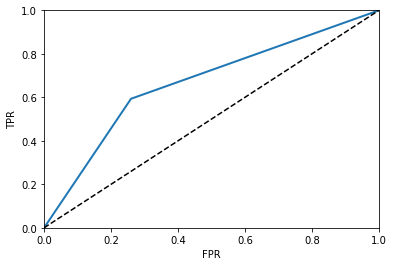

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 10], [0, 10], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(test_y,pred,pos_label = 1)

# ROC curve
plot_roc_curve(fpr, tpr)
plt.show()